# Coursework 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm

import scipy.stats as sps




# import sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sn


## 1. Data description and refining

In [2]:
df = pd.read_csv("coursework_1_data_2019.csv")
df.replace('\s+', '_',regex=True,inplace=True)
df.head()
df



,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking_and_Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough
3,Bath_and_North_East_Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South_West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East_of_England,unitary_authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,174733,209000,69000,47000,30000,41000,14000,8000,North_West,metropolitan_borough
148,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,86210,109000,20000,41000,13000,19000,10000,6000,South_East,unitary_authority
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,140604,201000,18000,27000,23000,55000,50000,28000,West_Midlands,metropolitan_borough
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,317961,470000,128000,112000,57000,76000,67000,30000,West_Midlands,non_metropolitan_county


In [3]:
# Insert calculated columns refer to:
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

In [4]:
# Calculate the rate of condition X
df["2008_X_rate"] = df["2008_cases_total"] / df["2008_pop_total"]
# df["2013_X_rate"] = df["2013_cases_total"] / df["2013_pop_total"]
df["2018_X_rate"] = df["2018_cases_total"] / df["2018_pop_total"]
df["rate_diff"] = df["2018_X_rate"] - df["2008_X_rate"]
df = df.round(4)
# round the decimal places
# df = df.style.format({
#      '2008_X_ratio': '{:,.4f}'.format,
#      '2013_X_ratio': '{:,.4f}'.format,
#      '2018_X_ratio': '{:,.4f}'.format
#  })



# df.insert(7, "2008_X_ratio",df["2008_cases_total"] / df["2008_pop_total"])

df.head()


,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_X_rate,2018_X_rate,rate_diff
0,Barking_and_Dagenham,593,619,763,172684,179030,181779,187,190,230,...,22000,18000,41000,18000,19000,London,london_borough,0.0034,0.0042,0.0008
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,17000,23000,74000,30000,26000,London,london_borough,0.0016,0.0022,0.0006
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,45000,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough,0.0016,0.0020,0.0005
3,Bath_and_North_East_Somerset,456,421,494,178625,172975,189334,157,129,156,...,42000,19000,50000,10000,7000,South_West,unitary_authority,0.0026,0.0026,0.0001
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,52000,17000,8000,3000,13000,East_of_England,unitary_authority,0.0020,0.0022,0.0002


In [5]:
df_2 = df.drop(['local_authority_area', '2008_cases_male', '2013_cases_male', '2018_cases_male', 
                      '2008_pop_male', '2013_pop_male', '2018_pop_male', 
                      '2008_cases_female', '2013_cases_female', '2018_cases_female',
                      '2008_pop_female', '2013_pop_female', '2018_pop_female'], axis = 1)

df_2

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_X_rate,2018_X_rate,rate_diff
0,593,619,763,172684,179030,181779,139000,21000,22000,18000,41000,18000,19000,London,london_borough,0.0034,0.0042,0.0008
1,539,594,773,340435,344062,355955,220000,50000,17000,23000,74000,30000,26000,London,london_borough,0.0016,0.0022,0.0006
2,360,451,527,226755,244010,257883,160000,41000,45000,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough,0.0016,0.0020,0.0005
3,456,421,494,178625,172975,189334,161000,33000,42000,19000,50000,10000,7000,South_West,unitary_authority,0.0026,0.0026,0.0001
4,311,327,367,158185,164807,170463,130000,37000,52000,17000,8000,3000,13000,East_of_England,unitary_authority,0.0020,0.0022,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2560,2652,2987,310630,312142,342200,209000,69000,47000,30000,41000,14000,8000,North_West,metropolitan_borough,0.0082,0.0087,0.0005
148,119,146,169,160803,165785,166687,109000,20000,41000,13000,19000,10000,6000,South_East,unitary_authority,0.0007,0.0010,0.0003
149,1442,1571,1728,239744,252117,264037,201000,18000,27000,23000,55000,50000,28000,West_Midlands,metropolitan_borough,0.0060,0.0065,0.0005
150,2718,3061,3237,559135,605974,636832,470000,128000,112000,57000,76000,67000,30000,West_Midlands,non_metropolitan_county,0.0049,0.0051,0.0002


## 2. Encoding of categorical variables and rearranging

In [6]:
# Select subset of a DataFrame
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
df_2 = df[['rate_diff', '2008_X_rate', '2018_X_rate', 'total_budget',
           'clean_air', 'clean_environ', 'health_training',
           'school_awareness', 'media_awareness', 'sub_counselling',
           'region', 'local_authority_type']]

# pd.set_option("display.max_rows", None, "display.max_columns", None)
# extend the dataframe line


df_2.head()
df_2


,rate_diff,2008_X_rate,2018_X_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,0.0008,0.0034,0.0042,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,0.0006,0.0016,0.0022,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,0.0005,0.0016,0.0020,160000,41000,45000,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough
3,0.0001,0.0026,0.0026,161000,33000,42000,19000,50000,10000,7000,South_West,unitary_authority
4,0.0002,0.0020,0.0022,130000,37000,52000,17000,8000,3000,13000,East_of_England,unitary_authority
5,0.0006,0.0023,0.0029,199000,72000,27000,14000,64000,15000,7000,London,london_borough
6,0.0005,0.0031,0.0036,831000,64000,272000,130000,126000,140000,99000,West_Midlands,metropolitan_borough
7,0.0008,0.0059,0.0068,91000,15000,16000,13000,21000,18000,8000,North_West,unitary_authority
8,0.0001,0.0041,0.0042,99000,24000,19000,9000,28000,10000,9000,North_West,unitary_authority
9,0.0005,0.0019,0.0024,201000,55000,68000,11000,25000,31000,11000,North_West,metropolitan_borough


In [7]:
df_numeric = pd.get_dummies(df_2)
df_numeric.head()


,rate_diff,2008_X_rate,2018_X_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region_East_Midlands,region_East_of_England,region_London,region_North_East,region_North_West,region_South_East,region_South_West,region_West_Midlands,region_Yorkshire_and_the_Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_other_london,local_authority_type_unitary_authority
0,0.0008,0.0034,0.0042,139000,21000,22000,18000,41000,18000,19000,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.0006,0.0016,0.0022,220000,50000,17000,23000,74000,30000,26000,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0.0005,0.0016,0.0020,160000,41000,45000,5000,26000,29000,14000,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0.0001,0.0026,0.0026,161000,33000,42000,19000,50000,10000,7000,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.0002,0.0020,0.0022,130000,37000,52000,17000,8000,3000,13000,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## 3. Checking the correlation between variables

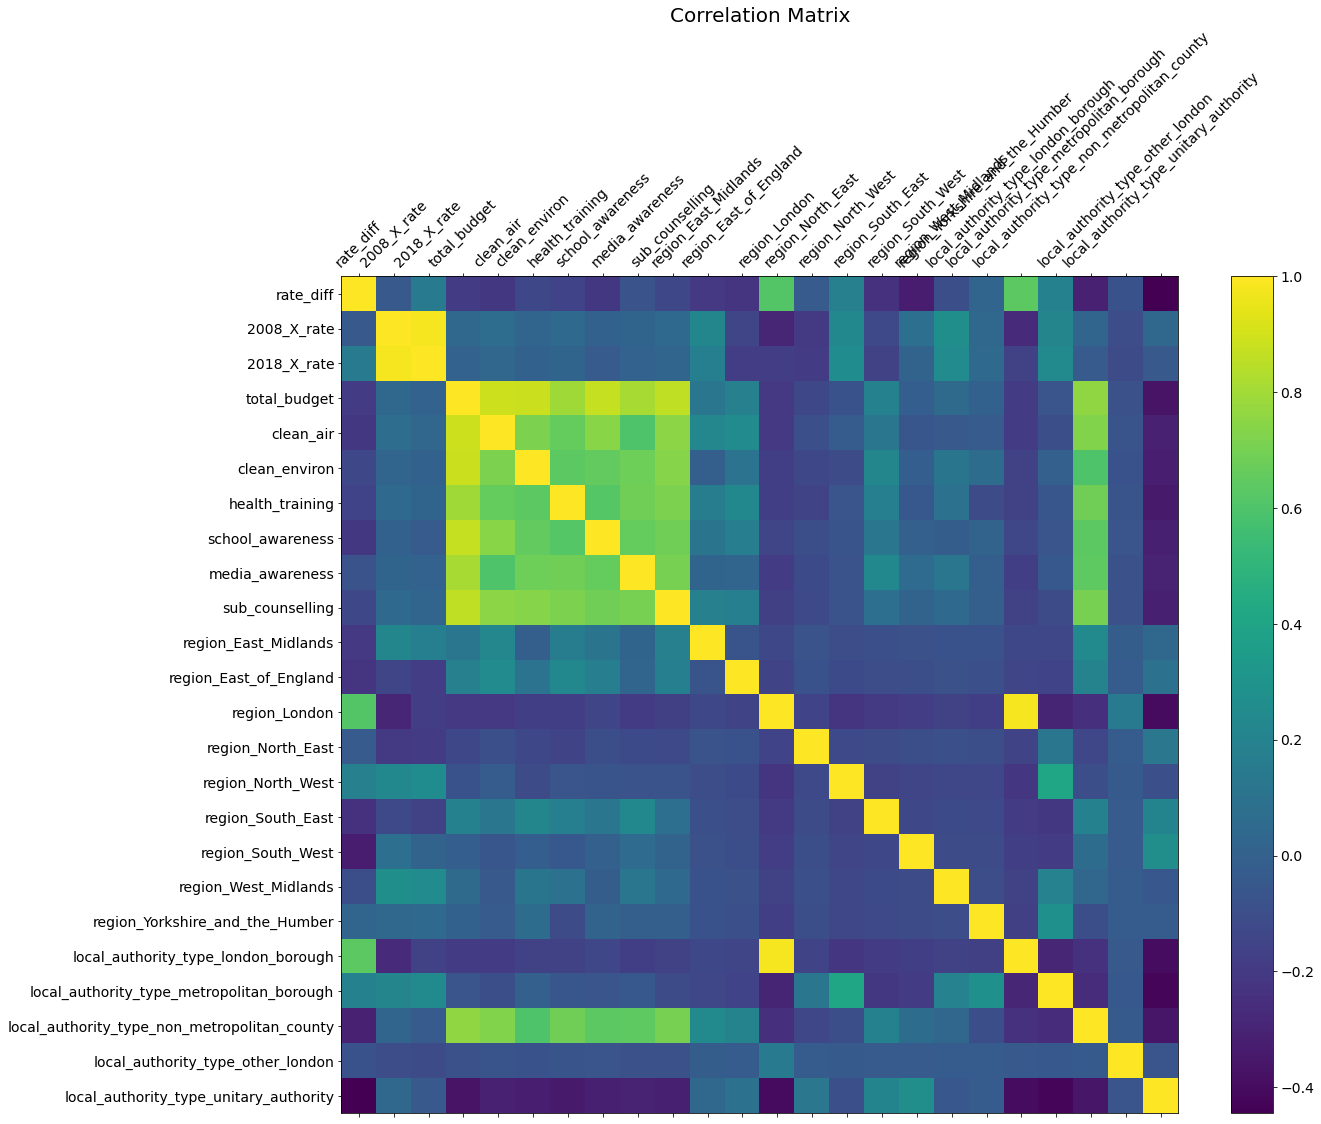

In [8]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df_numeric.corr(), fignum=f.number)
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20)

output_filename = 'Correlation Matrix.png'
plt.savefig(output_filename)


## 4. Dealing with multicollinearity (using VIF) and bulding the model

In [9]:

multi_regression_model_1 = sm.formula.ols('rate_diff ~ total_budget + clean_air + clean_environ + health_training + '
                                          'school_awareness + media_awareness + sub_counselling + region_East_Midlands + '
                                          'region_East_of_England + region_London + region_North_East + region_North_West + '
                                          'region_South_East + region_South_West + region_West_Midlands + '
                                          'region_Yorkshire_and_the_Humber + local_authority_type_london_borough + '
                                          'local_authority_type_metropolitan_borough + local_authority_type_non_metropolitan_county + '
                                          'local_authority_type_other_london + local_authority_type_unitary_authority', df_numeric).fit()
multi_regression_model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rate_diff   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     16.43
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           5.28e-25
Time:                        23:38:31   Log-Likelihood:                 1128.4
No. Observations:                 152   AIC:                            -2221.
Df Residuals:                     134   BIC:                            -2166.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.0002   2.73e-05      7.205      0.000       0.000       0.000
total_budget                                  3.356e-10   1.55e-10      2.169      0.032    2.96e-11    6.42e-10
clean_air                                    -4.457e-10   4.89e-10     -0.912      0.364   -1.41e-09    5.21e-10
clean_environ                                -3.648e-10   4.41e-10     -0.827      0.410   -1.24e-09    5.07e-10
health_training                              -5.372e-10   8.93e-10     -0.602      0.548    -2.3e-09    1.23e-09
school_awareness                             -1.477e-09   4.22e-10     -3.498      0.001   -2.31e-09   -6.42e-10
media_awareness                               2.038e-09    7.3e-10      2.791      0.006    5.94e-10    3.48e-09
sub_counselling                               1.122e-09   1.14e-09      0.986      0.326   -1.13e-09    3.37e-09
region_East_Midlands                         -3.918e-05   5.27e-05     -0.744      0.458      -0.000     6.5e-05
region_East_of_England                       -2.651e-05   4.81e-05     -0.552      0.582      -0.000    6.86e-05
region_London                                    0.0001    4.4e-05      2.852      0.005    3.85e-05       0.000
region_North_East                             6.848e-05   4.29e-05      1.597      0.113   -1.64e-05       0.000
region_North_West                                0.0002   3.52e-05      4.792      0.000    9.91e-05       0.000
region_South_East                            -3.472e-05   3.84e-05     -0.903      0.368      -0.000    4.13e-05
region_South_West                               -0.0001   3.91e-05     -2.970      0.004      -0.000   -3.88e-05
region_West_Midlands                         -3.455e-05   4.14e-05     -0.834      0.406      -0.000    4.74e-05
region_Yorkshire_and_the_Humber               8.488e-05   4.13e-05      2.053      0.042     3.1e-06       0.000
local_authority_type_london_borough              0.0003   5.86e-05      5.600      0.000       0.000       0.000
local_authority_type_metropolitan_borough        0.0001   3.02e-05      4.163      0.000     6.6e-05       0.000
local_authority_type_non_metropolitan_county -5.131e-05   4.68e-05     -1.095      0.275      -0.000    4.13e-05
local_authority_type_other_london               -0.0002   9.93e-05     -2.042      0.043      -0.000   -6.35e-06
local_authority_type_unitary_authority       -3.313e-06   2.35e-05     -0.141      0.888   -4.98e-05    4.31e-05
==============================================================================
Omnibus:                       26.528   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.158
Skew:                

In [10]:
# calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [11]:
df_predictors_selected_VIF = drop_column_using_vif_(df_numeric.drop('rate_diff', axis=1))


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: total_budget
Dropping: region_East_Midlands
Dropping: region_London
Dropping: local_authority_type_london_borough
Dropping: 2008_X_rate
Dropping: local_authority_type_metropolitan_borough


In [12]:
df_predictors_selected_VIF.columns


Index(['2018_X_rate', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling',
       'region_East_of_England', 'region_North_East', 'region_North_West',
       'region_South_East', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_other_london',
       'local_authority_type_unitary_authority'],
      dtype='object')

In [13]:
model_df = sm.OLS(endog=df_numeric[['rate_diff']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_df.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rate_diff   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     13.29
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           3.24e-21
Time:                        23:38:31   Log-Likelihood:                 1117.9
No. Observations:                 152   AIC:                            -2200.
Df Residuals:                     134   BIC:                            -2145.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0005   4.91e-05     10.922      0.000       0.000       0.001
2018_X_rate                                      0.0229      0.011      2.055      0.042       0.001       0.045
clean_air                                    -6.248e-10      5e-10     -1.250      0.213   -1.61e-09    3.63e-10
clean_environ                                 2.734e-10    3.9e-10      0.701      0.484   -4.97e-10    1.04e-09
health_training                              -1.045e-09      1e-09     -1.041      0.300   -3.03e-09    9.41e-10
school_awareness                             -1.046e-09   4.06e-10     -2.577      0.011   -1.85e-09   -2.43e-10
media_awareness                               2.817e-09   7.77e-10      3.625      0.000    1.28e-09    4.35e-09
sub_counselling                               1.148e-09   1.31e-09      0.874      0.384   -1.45e-09    3.75e-09
region_East_of_England                          -0.0001   6.54e-05     -2.213      0.029      -0.000   -1.54e-05
region_North_East                               -0.0001   5.77e-05     -2.274      0.025      -0.000   -1.71e-05
region_North_West                            -8.764e-05   4.48e-05     -1.958      0.052      -0.000    8.95e-07
region_South_East                               -0.0002   5.88e-05     -3.298      0.001      -0.000   -7.76e-05
region_South_West                               -0.0003   5.84e-05     -5.105      0.000      -0.000      -0.000
region_West_Midlands                            -0.0003   5.71e-05     -5.121      0.000      -0.000      -0.000
region_Yorkshire_and_the_Humber                 -0.0002   5.27e-05     -3.177      0.002      -0.000   -6.32e-05
local_authority_type_non_metropolitan_county    -0.0003    6.2e-05     -4.521      0.000      -0.000      -0.000
local_authority_type_other_london               -0.0004      0.000     -2.639      0.009      -0.001      -0.000
local_authority_type_unitary_authority          -0.0002   3.95e-05     -5.933      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       26.317   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.670
Skew:                          -0.750   Prob(JB):                     8.15e-13
Kurtosis:                       5.557   Cond. No.                     1.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
""

## 5. Residual Analysis

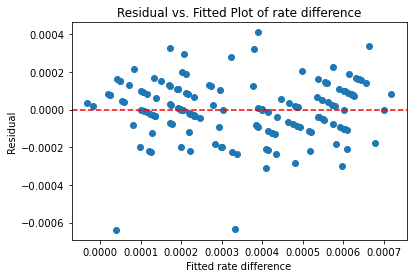

In [14]:
# plot 
plt.scatter(model_df.fittedvalues, model_df.resid)
# adding title and labels
plt.xlabel('Fitted rate difference')
plt.ylabel('Residual')
plt.axhline(y=0, linestyle='dashed', color='r')
# draw a horizontal line
# https://pythonguides.com/matplotlib-dashed-line/
plt.title('Residual vs. Fitted Plot of rate difference')
plt.show()


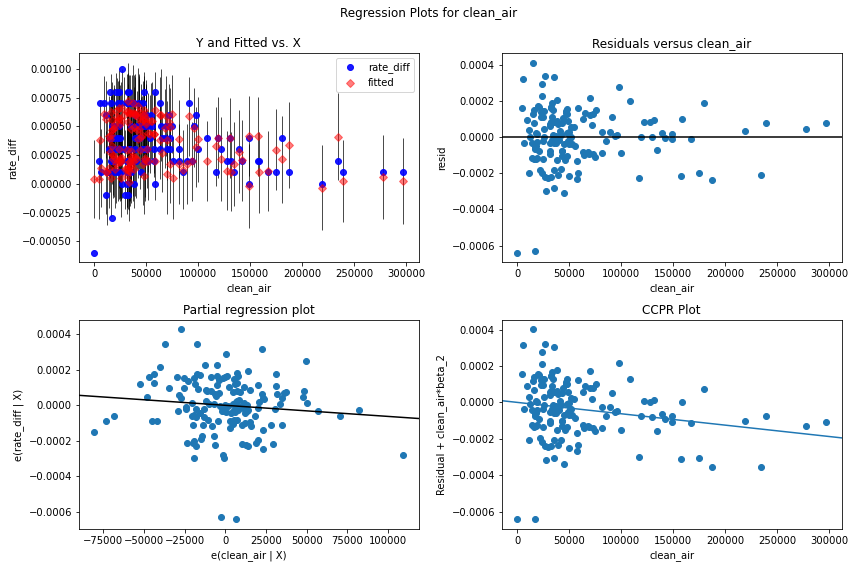

In [15]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_df, 'clean_air', fig=fig)


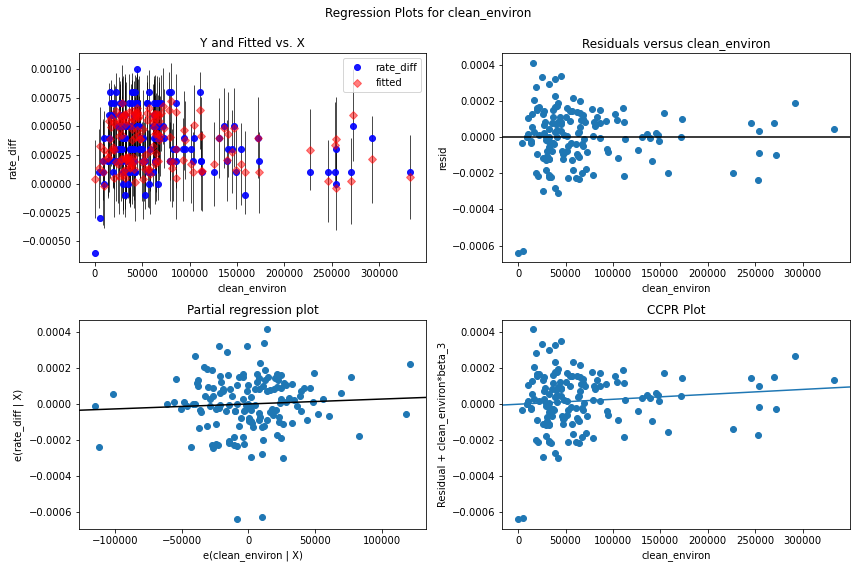

In [16]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_df, 'clean_environ', fig=fig)


## 6. Detecting and removing outliers

In [17]:
# from scipy import stats
# df_numeric = df_numeric[(np.abs(stats.zscore(df_numeric)) < 3).all(axis = 1)]


In [ ]:
# drop columns: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
df_numeric = df_numeric.drop([59,105], axis=0)
df_numeric = df_numeric.reset_index()
df_numeric = df_numeric.drop(columns="index")
df_numeric.head()



In [19]:
df_predictors_selected_VIF = drop_column_using_vif_(df_numeric.drop('rate_diff', axis=1))

df_predictors_selected_VIF.columns


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: total_budget
Dropping: region_East_Midlands
Dropping: region_London
Dropping: local_authority_type_london_borough
Dropping: 2008_X_rate
Dropping: local_authority_type_unitary_authority


Index(['2018_X_rate', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling',
       'region_East_of_England', 'region_North_East', 'region_North_West',
       'region_South_East', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_other_london'],
      dtype='object')

In [20]:
model_df = sm.OLS(endog=df_numeric[['rate_diff']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_df.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rate_diff   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     12.15
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.35e-19
Time:                        23:38:34   Log-Likelihood:                 1109.8
No. Observations:                 150   AIC:                            -2184.
Df Residuals:                     132   BIC:                            -2129.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0006   4.81e-05     12.026      0.000       0.000       0.001
2018_X_rate                                      0.0053      0.011      0.486      0.628      -0.016       0.027
clean_air                                    -8.105e-10   4.77e-10     -1.699      0.092   -1.75e-09    1.33e-10
clean_environ                                 5.936e-10   3.67e-10      1.616      0.108   -1.33e-10    1.32e-09
health_training                              -7.653e-10    9.7e-10     -0.789      0.432   -2.68e-09    1.15e-09
school_awareness                             -1.028e-09   3.89e-10     -2.645      0.009    -1.8e-09   -2.59e-10
media_awareness                               2.947e-09   7.43e-10      3.966      0.000    1.48e-09    4.42e-09
sub_counselling                               9.911e-11   1.25e-09      0.079      0.937   -2.38e-09    2.58e-09
region_East_of_England                          -0.0003   5.73e-05     -5.819      0.000      -0.000      -0.000
region_North_East                               -0.0003   5.62e-05     -5.428      0.000      -0.000      -0.000
region_North_West                               -0.0002   5.04e-05     -3.791      0.000      -0.000   -9.14e-05
region_South_East                               -0.0004   4.75e-05     -8.458      0.000      -0.000      -0.000
region_South_West                               -0.0004   4.96e-05     -9.032      0.000      -0.001      -0.000
region_West_Midlands                            -0.0004   5.68e-05     -7.292      0.000      -0.001      -0.000
region_Yorkshire_and_the_Humber                 -0.0003   5.54e-05     -5.358      0.000      -0.000      -0.000
local_authority_type_metropolitan_borough     9.973e-05    4.3e-05      2.321      0.022    1.47e-05       0.000
local_authority_type_non_metropolitan_county    -0.0001   5.93e-05     -2.031      0.044      -0.000   -3.14e-06
local_authority_type_other_london               -0.0005      0.000     -2.860      0.005      -0.001      -0.000
==============================================================================
Omnibus:                        2.722   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.270
Skew:                          -0.281   Prob(JB):                        0.321
Kurtosis:                       3.217   Cond. No.                     1.29e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
""

## 7. Interpreting the model

The R-squared value is 0.628, meaning that 62.8% of the total variance of the Condition X can be explained by the variables used in the model.

## 8. Adjusted R-squared

In [21]:
df_predictors_adding_random = df_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)

# adding 'totally_random', which is random noise and shows no relationship with the response variable
df_predictors_adding_random['totally_random'] = np.random.normal(0,5,df_predictors_adding_random.shape[0])
# the model without windspeed
model_df_adding_random = sm.OLS(endog=df_numeric[['rate_diff']], exog=sm.add_constant(df_predictors_adding_random)).fit()
model_df_adding_random.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rate_diff   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     11.67
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.92e-19
Time:                        23:38:34   Log-Likelihood:                 1111.0
No. Observations:                 150   AIC:                            -2184.
Df Residuals:                     131   BIC:                            -2127.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0006    4.8e-05     11.942      0.000       0.000       0.001
2018_X_rate                                      0.0045      0.011      0.419      0.676      -0.017       0.026
clean_air                                    -7.424e-10   4.78e-10     -1.554      0.123   -1.69e-09    2.03e-10
clean_environ                                 6.376e-10   3.67e-10      1.736      0.085   -8.89e-11    1.36e-09
health_training                              -9.589e-10   9.76e-10     -0.983      0.328   -2.89e-09    9.72e-10
school_awareness                             -1.092e-09    3.9e-10     -2.800      0.006   -1.86e-09    -3.2e-10
media_awareness                               3.016e-09   7.42e-10      4.065      0.000    1.55e-09    4.48e-09
sub_counselling                              -1.412e-10   1.26e-09     -0.112      0.911   -2.63e-09    2.35e-09
region_East_of_England                          -0.0003   5.84e-05     -5.418      0.000      -0.000      -0.000
region_North_East                               -0.0003   5.67e-05     -5.161      0.000      -0.000      -0.000
region_North_West                               -0.0002   5.12e-05     -3.447      0.001      -0.000   -7.53e-05
region_South_East                               -0.0004   4.74e-05     -8.432      0.000      -0.000      -0.000
region_South_West                               -0.0004   4.99e-05     -8.797      0.000      -0.001      -0.000
region_West_Midlands                            -0.0004   5.71e-05     -7.083      0.000      -0.001      -0.000
region_Yorkshire_and_the_Humber                 -0.0003   5.62e-05     -5.009      0.000      -0.000      -0.000
local_authority_type_metropolitan_borough        0.0001   4.28e-05      2.355      0.020    1.61e-05       0.000
local_authority_type_non_metropolitan_county    -0.0001   5.98e-05     -1.805      0.073      -0.000    1.04e-05
local_authority_type_other_london               -0.0005      0.000     -3.029      0.003      -0.001      -0.000
totally_random                               -4.306e-06   3.04e-06     -1.414      0.160   -1.03e-05    1.72e-06
==============================================================================
Omnibus:                        1.569   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.238
Skew:                          -0.213   Prob(JB):                        0.538
Kurtosis:                       3.129   Cond. No.                     1.29e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numbe

## 9. Linear regression without a constant

In [22]:
model_df_no_constant = sm.OLS(endog=df_numeric[['rate_diff']], exog=df_predictors_selected_VIF).fit()
model_df_no_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              rate_diff   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              23.11
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                    2.71e-32
Time:                        23:38:34   Log-Likelihood:                          1055.7
No. Observations:                 150   AIC:                                     -2075.
Df Residuals:                     132   BIC:                                     -2021.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
2018_X_rate                                      0.0992      0.011      9.374      0.000       0.078       0.120
clean_air                                    -5.851e-10   6.87e-10     -0.851      0.396   -1.95e-09    7.75e-10
clean_environ                                 7.747e-10   5.28e-10      1.466      0.145   -2.71e-10    1.82e-09
health_training                               3.111e-10    1.4e-09      0.223      0.824   -2.45e-09    3.07e-09
school_awareness                             -4.539e-10   5.56e-10     -0.817      0.416   -1.55e-09    6.46e-10
media_awareness                               3.545e-09   1.07e-09      3.325      0.001    1.44e-09    5.65e-09
sub_counselling                               7.938e-10   1.81e-09      0.438      0.662   -2.79e-09    4.38e-09
region_East_of_England                          -0.0001      8e-05     -1.275      0.204      -0.000    5.62e-05
region_North_East                              -9.9e-06   7.42e-05     -0.133      0.894      -0.000       0.000
region_North_West                             -5.93e-05   7.24e-05     -0.819      0.414      -0.000    8.39e-05
region_South_East                               -0.0002   6.44e-05     -3.287      0.001      -0.000   -8.43e-05
region_South_West                               -0.0003   6.98e-05     -4.298      0.000      -0.000      -0.000
region_West_Midlands                            -0.0003   8.18e-05     -4.137      0.000      -0.001      -0.000
region_Yorkshire_and_the_Humber                 -0.0001   7.86e-05     -1.534      0.127      -0.000    3.49e-05
local_authority_type_metropolitan_borough     3.578e-05   6.11e-05      0.585      0.559   -8.52e-05       0.000
local_authority_type_non_metropolitan_county    -0.0003   8.37e-05     -3.293      0.001      -0.000      -0.000
local_authority_type_other_london               -0.0001      0.000     -0.471      0.638      -0.001       0.000
totally_random                               -6.864e-06   4.37e-06     -1.570      0.119   -1.55e-05    1.79e-06
==============================================================================
Omnibus:                        2.390   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.916
Skew:                          -0.240   Prob(JB):                        0.384
Kurtosis:                       3.276   Cond. No.                     8.77e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that th